In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout

In [2]:
dataset = pd.read_excel('Seismic_Prep.xlsx')
X = dataset.iloc[:, 0:5].values
y =np.log(dataset.iloc[:, 5:].values)
dataset.head()

,Mw,HypD,LN(Vs30),LN(Rjb),Rjb,T0.01s,T0.02s,T0.03s,T0.04s,T0.05s,...,T0.4s,T0.5s,T0.6s,T0.7s,T0.8s,T0.9s,T1s,T2s,T3s,T4s
0,5.85,94.18,5.075174,4.461069,86.58,0.142462,0.152200,0.161892,0.145838,0.161845,...,0.224295,0.137886,0.097615,0.077825,0.067349,0.051338,0.040891,0.019077,0.004028,0.001767
1,5.85,50.57,7.600902,3.735286,41.90,0.129427,0.191862,0.264744,0.283888,0.299292,...,0.070572,0.042309,0.036149,0.035119,0.019036,0.010532,0.007336,0.001703,0.000672,0.000368
2,5.85,95.98,7.600902,4.486837,88.84,0.090425,0.111568,0.111298,0.127728,0.169176,...,0.097513,0.091252,0.063955,0.053468,0.042222,0.031097,0.023615,0.004622,0.001691,0.000810
3,5.85,93.58,7.600902,4.456670,86.20,0.106145,0.150519,0.207282,0.235955,0.201955,...,0.103555,0.067823,0.047149,0.034529,0.025256,0.021171,0.017829,0.003564,0.001304,0.000693
4,5.85,151.09,7.600902,4.971617,144.26,0.049757,0.051500,0.050920,0.058937,0.073742,...,0.049420,0.030512,0.020130,0.016700,0.020684,0.020534,0.017344,0.002665,0.001248,0.000586


In [3]:
y

array([[ -1.94867998,  -1.88255983,  -1.82082583, ...,  -3.95929283,
         -5.51437607,  -6.33833061],
       [ -2.04463826,  -1.65097892,  -1.32899196, ...,  -6.37536975,
         -7.30504986,  -7.90839548],
       [ -2.40323008,  -2.19312101,  -2.19554399, ...,  -5.37689748,
         -6.38236425,  -7.11900979],
       ...,
       [ -8.11990812,  -8.24572435,  -8.11823923, ..., -13.20089806,
        -14.15531996, -14.70041164],
       [ -7.48674198,  -7.56394777,  -7.39785876, ..., -12.953883  ,
        -13.76141071, -14.35562597],
       [ -7.93281232,  -8.02763819,  -7.79261518, ..., -12.68231972,
        -13.68572869, -14.29363507]])

In [4]:
dataset.shape

(7885, 27)

In [5]:
dataset.describe()

,Mw,HypD,LN(Vs30),LN(Rjb),Rjb,T0.01s,T0.02s,T0.03s,T0.04s,T0.05s,...,T0.4s,T0.5s,T0.6s,T0.7s,T0.8s,T0.9s,T1s,T2s,T3s,T4s
count,7885.000000,7885.000000,7885.000000,7885.000000,7885.000000,7.885000e+03,7.885000e+03,7.885000e+03,7.885000e+03,7.885000e+03,...,7.885000e+03,7.885000e+03,7.885000e+03,7.885000e+03,7.885000e+03,7.885000e+03,7.885000e+03,7.885000e+03,7.885000e+03,7.885000e+03
mean,4.295287,718.876430,6.346732,6.342075,718.064415,1.218784e-03,1.379502e-03,1.680987e-03,2.015215e-03,2.056957e-03,...,1.126692e-03,9.200300e-04,7.512581e-04,6.043081e-04,4.863289e-04,4.035294e-04,3.432899e-04,1.089154e-04,5.850912e-05,4.209748e-05
std,0.666098,390.225088,0.570021,0.834389,390.407895,9.995880e-03,1.319069e-02,1.525614e-02,2.524899e-02,1.880614e-02,...,8.079721e-03,6.618218e-03,5.717491e-03,4.497798e-03,3.435290e-03,2.746852e-03,2.394817e-03,1.043024e-03,5.586914e-04,5.204592e-04
min,3.050000,5.320000,4.969813,0.009950,1.010000,1.498090e-07,1.507980e-07,1.482690e-07,1.486450e-07,1.498370e-07,...,4.530440e-07,5.779670e-07,5.607260e-07,4.167060e-07,3.546960e-07,2.775170e-07,1.776610e-07,1.846500e-08,6.918940e-09,3.859740e-09
25%,3.860000,410.440000,5.992963,6.016255,410.040000,1.030640e-05,1.034220e-05,1.053370e-05,1.053460e-05,1.071810e-05,...,2.285000e-05,2.149100e-05,1.893520e-05,1.635740e-05,1.356200e-05,1.148470e-05,9.555930e-06,2.580350e-06,1.084700e-06,7.286040e-07
50%,4.030000,688.930000,6.233234,6.534239,688.310000,4.398710e-05,4.447790e-05,4.571040e-05,4.650270e-05,4.726580e-05,...,8.725250e-05,7.805900e-05,6.848930e-05,5.715410e-05,4.846160e-05,4.020200e-05,3.325990e-05,8.464530e-06,3.389370e-06,1.986190e-06
75%,4.680000,1019.640000,6.558198,6.926724,1019.150000,2.619860e-04,2.655690e-04,2.789420e-04,2.815430e-04,2.973960e-04,...,4.226910e-04,3.525720e-04,3.062300e-04,2.571290e-04,2.203440e-04,1.861530e-04,1.579750e-04,4.807710e-05,2.040810e-05,1.235750e-05
max,5.850000,1500.150000,7.600902,7.312907,1499.530000,3.864060e-01,7.439080e-01,7.901830e-01,1.809280e+00,7.996280e-01,...,2.753140e-01,2.567660e-01,2.466590e-01,1.888630e-01,1.665980e-01,1.243310e-01,1.121610e-01,6.600440e-02,3.505080e-02,3.341650e-02


### Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

## Standard Scale test and train data
###  Min Max normalization

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Create the MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)
X_test=pd.DataFrame(X_test)
X_train=pd.DataFrame(X_train)

In [8]:
print("x_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (6308, 5)
y_train shape: (6308, 22)
x_test shape: (1577, 5)
y_test shape: (1577, 22)


## Part 2 - Building the ANN


### Initializing the ANN

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

hidden_units1 = 7
# hidden_units2 = 10 # Number of units in the second hidden layer
learning_rate = 0.01

# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
    model = Sequential([
        Dense(hidden_units1, kernel_initializer='normal', activation='relu',input_shape=(5,)),
        Dense(22, kernel_initializer='normal', activation='linear')
    ])
    return model

# build the model
model = build_model_using_sequential()

# Compile the model
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

### Loss Function

In [10]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import numpy as np

# Custom log-likelihood loss function
def log_likelihood_loss(y_true, y_pred):
    # Assuming y_pred follows a normal distribution with a fixed standard deviation
    # You may need to adjust the parameters based on your specific model and problem
    mu = y_pred
    sigma = 1.0  # Set a fixed standard deviation for simplicity, adjust as needed

    # Log-likelihood for a normal distribution
    log_likelihood = -0.5 * tf.reduce_sum(tf.square((y_true - mu) / sigma) + tf.math.log(2.0 * np.pi * sigma**2), axis=-1)

    return -log_likelihood  # Return the negative log-likelihood as we typically minimize loss in training

# Compile the model with the custom log-likelihood loss
learning_rate = 0.01  # Set your desired learning rate
optimizer = Adam(learning_rate=learning_rate)

model.compile(
    loss=log_likelihood_loss, 
    optimizer=optimizer,
)

# train the model
history = model.fit(
    X_train.values, 
    y_train.values, 
    epochs=100, 
    batch_size=32,
    validation_split=0.20
)


Epoch 1/100

158/158 [==============================] - 1s 3ms/step - loss: 320.0543 - val_loss: 65.9005
Epoch 2/100
158/158 [==============================] - 0s 1ms/step - loss: 54.7489 - val_loss: 45.3931
Epoch 3/100
158/158 [==============================] - 0s 2ms/step - loss: 38.9186 - val_loss: 35.0697
Epoch 4/100
158/158 [==============================] - 0s 1ms/step - loss: 33.5770 - val_loss: 32.8032
Epoch 5/100
158/158 [==============================] - 0s 1ms/step - loss: 32.1970 - val_loss: 31.6403
Epoch 6/100
158/158 [==============================] - 0s 1ms/step - loss: 31.2927 - val_loss: 30.8566
Epoch 7/100
158/158 [==============================] - 0s 1ms/step - loss: 30.5072 - val_loss: 30.3060
Epoch 8/100
158/158 [==============================] - 0s 1ms/step - loss: 30.2090 - val_loss: 30.0493
Epoch 9/100
158/158 [==============================] - 0s 2ms/step - loss: 30.1570 - val_loss: 30.0170
Epoch 10/100
158/158 [==============================] - 0s 1ms/step - l

Epoch 78/100
158/158 [==============================] - 0s 1ms/step - loss: 29.4028 - val_loss: 29.5400
Epoch 79/100
158/158 [==============================] - 0s 2ms/step - loss: 29.3770 - val_loss: 28.9931
Epoch 80/100
158/158 [==============================] - 0s 1ms/step - loss: 29.4379 - val_loss: 29.0501
Epoch 81/100
158/158 [==============================] - 0s 2ms/step - loss: 29.3955 - val_loss: 29.2027
Epoch 82/100
158/158 [==============================] - 0s 2ms/step - loss: 29.5073 - val_loss: 29.6317
Epoch 83/100
158/158 [==============================] - 0s 2ms/step - loss: 29.5282 - val_loss: 29.5323
Epoch 84/100
158/158 [==============================] - 0s 1ms/step - loss: 29.4174 - val_loss: 29.1297
Epoch 85/100
158/158 [==============================] - 0s 2ms/step - loss: 29.4387 - val_loss: 29.9952
Epoch 86/100
158/158 [==============================] - 0s 2ms/step - loss: 29.5461 - val_loss: 29.0539
Epoch 87/100
158/158 [==============================] - 0s 2ms/s

In [11]:
# Predictions on test set
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
y_test_pred = pd.DataFrame(y_test_pred)

198/198 [==============================] - 0s 1ms/step


In [12]:
y_test=pd.DataFrame(y_test)
y_test_pred=pd.DataFrame(y_test_pred)
y_train=pd.DataFrame(y_train)
y_train_pred=pd.DataFrame(y_train_pred)

In [13]:
y_test_pred

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-9.604729,-9.595448,-9.542188,-9.557566,-9.505580,-9.388024,-9.256004,-9.168862,-9.133512,-9.094251,...,-9.117468,-9.362283,-9.585925,-9.840886,-10.100230,-10.324684,-10.557938,-11.949107,-12.900636,-13.462307
1,-9.861887,-9.852931,-9.863346,-9.879709,-9.881751,-9.870205,-9.831768,-9.815747,-9.802216,-9.784657,...,-8.885033,-8.740633,-8.644992,-8.692057,-8.787304,-8.855140,-8.952560,-9.776575,-10.502282,-10.935419
2,-9.745898,-9.738772,-9.734283,-9.755514,-9.735072,-9.682699,-9.604515,-9.555432,-9.528325,-9.495906,...,-8.906442,-8.918538,-8.952254,-9.084277,-9.246887,-9.379801,-9.533863,-10.595488,-11.416171,-11.903978
3,-6.082060,-6.036097,-5.787884,-5.724950,-5.625057,-5.420104,-5.277116,-5.201831,-5.210937,-5.232575,...,-6.942533,-7.506600,-7.959414,-8.338588,-8.682236,-8.973051,-9.252076,-10.825315,-11.701419,-12.324142
4,-9.057542,-9.048457,-9.017493,-9.036686,-8.992417,-8.901560,-8.792665,-8.717487,-8.681931,-8.640902,...,-8.444051,-8.611191,-8.768553,-8.978440,-9.200866,-9.390206,-9.591679,-10.852037,-11.727527,-12.265436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572,-7.652140,-7.641740,-7.637245,-7.654819,-7.632363,-7.607998,-7.571175,-7.543998,-7.525975,-7.498165,...,-6.835402,-6.783921,-6.745906,-6.821858,-6.934847,-7.018859,-7.126223,-7.991081,-8.637268,-9.096182
1573,-9.257178,-9.244242,-9.285357,-9.299818,-9.321841,-9.358892,-9.363020,-9.375011,-9.365911,-9.354803,...,-8.118446,-7.821384,-7.601207,-7.564001,-7.590372,-7.591251,-7.627897,-8.202635,-8.805321,-9.190168
1574,-12.534616,-12.529844,-12.412453,-12.397704,-12.397737,-12.323493,-12.267895,-12.278758,-12.322504,-12.359965,...,-11.994798,-11.915826,-11.853578,-11.928679,-12.053278,-12.148549,-12.280064,-13.214015,-14.057616,-14.474575
1575,-9.575413,-9.557681,-9.347528,-9.320261,-9.234354,-9.025062,-8.859914,-8.775433,-8.784081,-8.790383,...,-9.912096,-10.400931,-10.796434,-11.157445,-11.499619,-11.798429,-12.098147,-13.743062,-14.771084,-15.374548


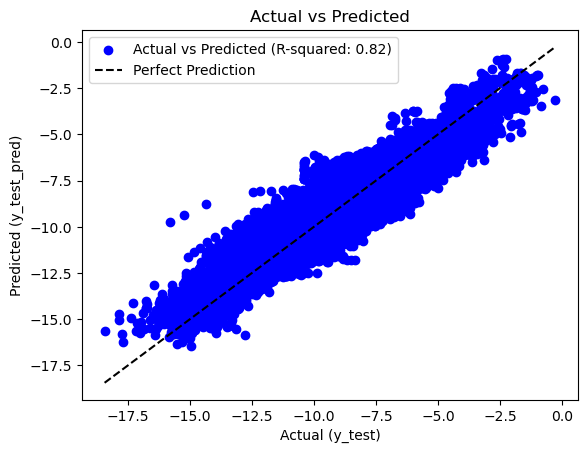

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Convert Pandas Series to NumPy arrays
y_test_array = y_test.values
y_test_pred_array = y_test_pred.values
y_train_array = y_train.values
y_train_pred_array = y_train_pred.values

# Calculate R-squared value
r_squared_test = r2_score(y_test_array, y_test_pred_array)
# r_squared_train = r2_score(y_train_array, y_train_pred_array)

# Plot scatter plot of y_test vs y_test_pred
plt.scatter(y_test_array, y_test_pred_array, color='blue', label=f'Actual vs Predicted (R-squared: {r_squared_test:.2f})')

# Plot scatter plot of y_train vs y_train_pred
# plt.scatter(y_train_array, y_train_pred_array, color='red', label=f'Actual vs Predicted (R-squared: {r_squared_train:.2f})')

# Plot R-squared line
min_val = min(np.min(y_test_array), np.min(y_test_pred_array))
max_val = max(np.max(y_test_array), np.max(y_test_pred_array))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual (y_test)')
plt.ylabel('Predicted (y_test_pred)')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()